# Assignment 3

 In this Assignment, we will use CNN to classify digits.   
The `MNIST` database is a large database of handwritten digits that is commonly used for training various image processing systems.



## Importing TensorFlow

In [ ]:
import tensorflow as tf

## Get the dataset

In [ ]:
# Import the dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
# Split the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_test,y_test,test_size=0.2)

## Visualize the dataset
Print some images with labels.

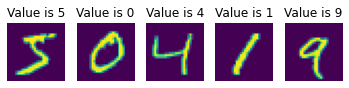

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
  plt.subplot(2,5, i+1)
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.title("Value is {}".format(y_train[i]))

# Your code

Plot statistics of the training and testing dataset  
(`x axis`: digits, `y axis`: number of samples corresponding to the digits)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:


df_y_train = pd.DataFrame({'Y_Train':y_train})
df_y_test = pd.DataFrame({'Y_Test':y_test})

# Your code

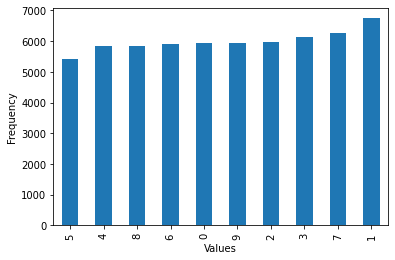

In [ ]:
# Given below is the code that produces frequency of labels appearing in training dataset
df_y_train['Y_Train'].value_counts(ascending=True).plot( kind='bar', xlabel='Values', ylabel='Frequency')


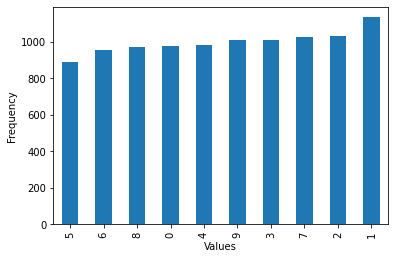

In [ ]:
df_y_test['Y_Test'].value_counts(ascending=True).plot( kind='bar', xlabel='Values', ylabel='Frequency')

So we can see that the frequency of labels in the test dataset are in same proportion as in the training dataset.

In [ ]:
# Pre Processing

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.losses import BinaryCrossentropy,sparse_categorical_crossentropy

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

## Model

In [ ]:
# model building
model=tf.keras.Sequential([
        Flatten(input_shape=(28,28)),
        Dense(64,activation='relu'),
        Dense(128,activation='relu'),
       Dense(10,activation=tf.nn.softmax)

  ])
model.compile(optimizer='adam',
              loss=sparse_categorical_crossentropy,
              metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10,validation_split=0.2)

# You are supposed to look at some CNN architectures and add convolutional layers along with MaxPooling, specifying the kernel size, pooling size, activation 


Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3446 - accuracy: 0.8994 - val_loss: 0.1907 - val_accuracy: 0.9445
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1507 - accuracy: 0.9546 - val_loss: 0.1450 - val_accuracy: 0.9535
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1059 - accuracy: 0.9678 - val_loss: 0.1205 - val_accuracy: 0.9625
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0800 - accuracy: 0.9747 - val_loss: 0.1160 - val_accuracy: 0.9646
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0639 - accuracy: 0.9796 - val_loss: 0.1037 - val_accuracy: 0.9676
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0506 - accuracy: 0.9835 - val_loss: 0.1033 - val_accuracy: 0.9695
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0409 - accuracy: 0.9864 - val_loss: 0.1085 - val_accuracy:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Legend does not support 'Loss' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """


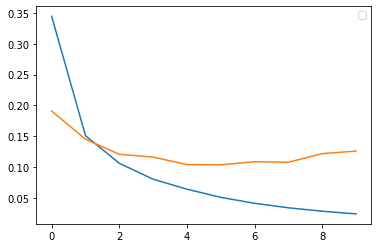

In [ ]:
res_2=pd.DataFrame(history.history)
res_2['epoch']=history.epoch
plt.plot(res_2['epoch'],res_2['loss'])
plt.plot(res_2['epoch'],res_2['val_loss'])
plt.legend(["Loss"],["Val_loss"])



## Predict some images
Print the image along with its label (true value) and predicted value.

In [ ]:
# Your code
y_predicted=[]
y_pred=model.predict(x_test)
for i in range(x_test.shape[0]):
  y_predicted.append(np.argmax(y_pred[i]))


In [ ]:
y_test[7]

9

Text(0.5, 1.0, 'Actual Label 9 , Predicted label 9 ')

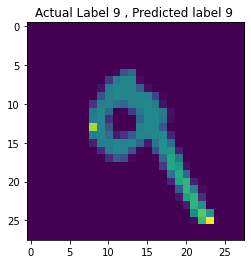

In [ ]:
t=7
plt.imshow(x_test[t])
plt.title("Actual Label {} , Predicted label {} ".format(y_test[t],y_predicted[t]))